## Classification Assignment- 1
AIMD hospital is a medical facility that has just hired an intern in the Machine Learning space due to the vast advancements of ML in the medical field. This facility has given the intern the data of 769 patients who have cancer and who have don’t have cancer. These patients have other conditions as well like past pregnancies, diabetes, insulin intake, etc. The doctors are hoping these attributes will help the intern learn & build a model to predict whether a patient is likely to have cancer or not based on certain attributes.

Assuming that you are the intern, you have to build a KNN classifier that will predict whether a patient is susceptible to cancer or not.  

You are expected to perform the following.

Exploratory Data Analysis on the dataset

Building the KNN classifier

Model performance Analysis

# (A)	COLLECT / EXTRACT DATA

Below table was created while trying to understand various feature attributes and get more insights about them like data type of values, range, derived attributes, attributes that needs conversion, and categorical number using excel. So we can use these for feature engineering.

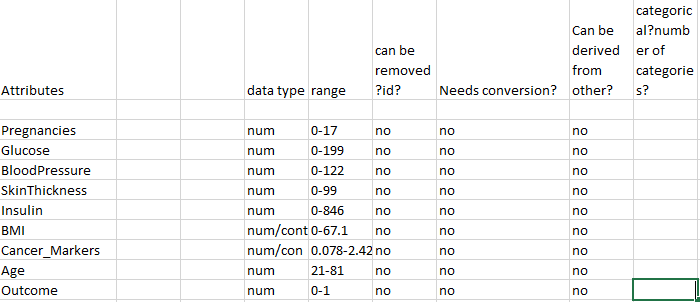

# 1. Import libraries

In [1]:
#Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import ttest_ind, ttest_rel
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc, log_loss
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 

# 2. Loading the Data

In [2]:
# Preprocessing Input data
df = pd.read_csv("Cancer_Dataset1.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.dtypes

Pregnancies         int64
Glucose             int64
BloodPressure       int64
SkinThickness       int64
Insulin             int64
BMI               float64
Cancer_Markers    float64
Age                 int64
Outcome             int64
dtype: object

# 3. Data Exploration

## 3.a. Describe the dataset

In [4]:
#Describe the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data seems well distributed, but some values have value 0- which is not possible: like Blood pressure and Glucose and BMI. Need to remove them.

In [5]:
#look at random sample
df.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
413,1,143,74,22,61,26.2,0.256,21,0
383,1,90,62,18,59,25.1,1.268,25,0
37,9,102,76,37,0,32.9,0.665,46,1
537,0,57,60,0,0,21.7,0.735,67,0
562,1,87,68,34,77,37.6,0.401,24,0
60,2,84,0,0,0,0.0,0.304,21,0
559,11,85,74,0,0,30.1,0.300,35,0
142,2,108,52,26,63,32.5,0.318,22,0
302,5,77,82,41,42,35.8,0.156,35,0
759,6,190,92,0,0,35.5,0.278,66,1


In [6]:
#Check for shape of the data
df.shape

(768, 9)

## 3.b. Check for any null values in the dataset

In [7]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     768 non-null    int64  
 1   Glucose         768 non-null    int64  
 2   BloodPressure   768 non-null    int64  
 3   SkinThickness   768 non-null    int64  
 4   Insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   Cancer_Markers  768 non-null    float64
 7   Age             768 non-null    int64  
 8   Outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies       0
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI               0
Cancer_Markers    0
Age               0
Outcome           0
dtype: int64

## 3.c. Check for duplicate values in the dataset

In [9]:
#check for duplicates
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome


No duplicate data

## 4.a. Univariate analysis of Numerical data

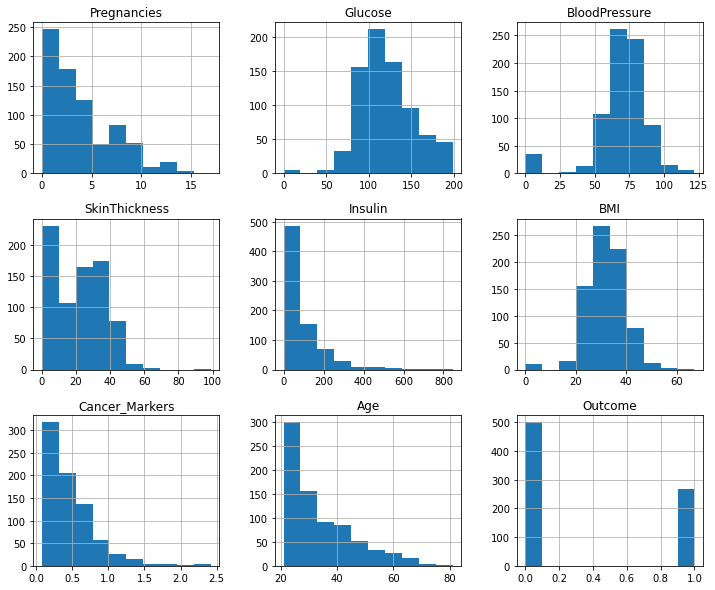

In [10]:
#plot histogram for attributes of type number(float and int)
df.select_dtypes(include='number').hist(figsize=(12,10))
plt.show()

## 4.b. Check for Correctness of Data

Some values have value 0- which is not possible: like Blood pressure and Glucose and BMI. Need to remove them.

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
print(np.sum(df['BloodPressure'] == 0))

35


In [13]:
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Mean and median seems almost same. Lets replace 35 entries with Blood Pressure 0 by Mean- 69.

In [14]:
df_new = df[df['BloodPressure'] != 0]
df_new['BloodPressure'].mean()

72.40518417462484

In [15]:
df = df.replace({'BloodPressure': {0: df_new['BloodPressure'].mean()}})

In [16]:
#crosscheck entries with 0
print(np.sum(df['BloodPressure'] == 0))

0


In [17]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [18]:
print(np.sum(df['Glucose'] == 0))

5


In [19]:
df_new = df[df['Glucose'] != 0]
df_new['Glucose'].mean()

121.6867627785059

In [20]:
df = df.replace({'Glucose': {0: df_new['Glucose'].mean()}})

In [21]:
#crosscheck entries with 0
print(np.sum(df['Glucose'] == 0))

0


In [22]:
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [23]:
print(np.sum(df['BMI'] == 0))

11


In [24]:
df_new = df[df['BMI'] != 0]
df_new['BMI'].mean()

32.45746367239099

In [25]:
df = df.replace({'BMI': {0: df_new['BMI'].mean()}})

In [26]:
#crosscheck entries with 0
print(np.sum(df['BMI'] == 0))

0


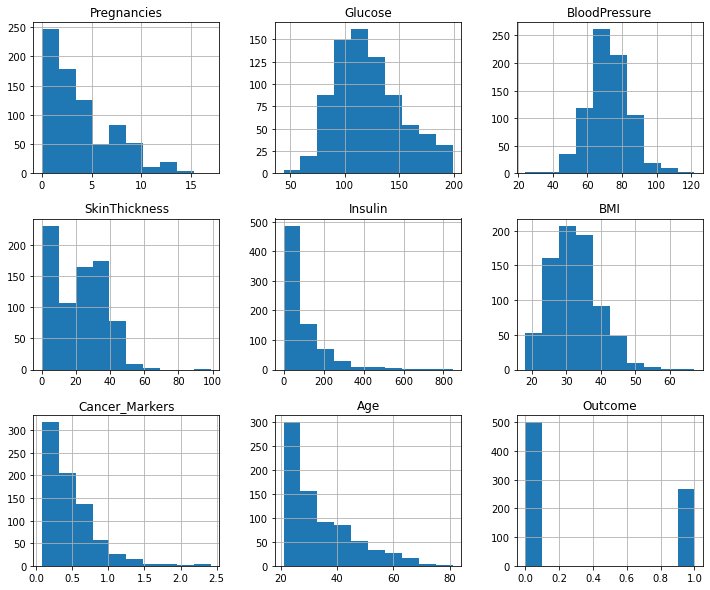

In [27]:
#check for distribution again
#plot histogram for attributes of type number(float and int)
df.select_dtypes(include='number').hist(figsize=(12,10))
plt.show()

## 4.c. Check for Outliers if any

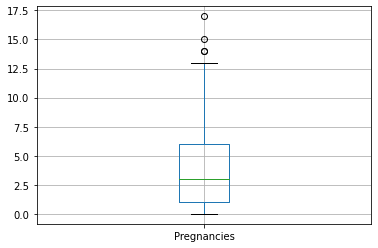

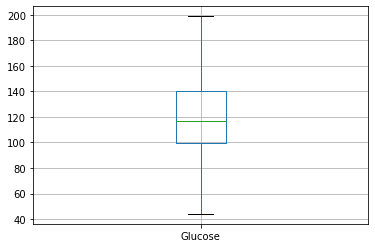

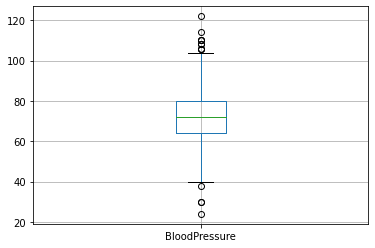

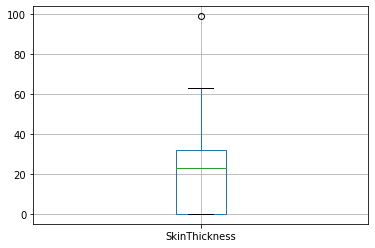

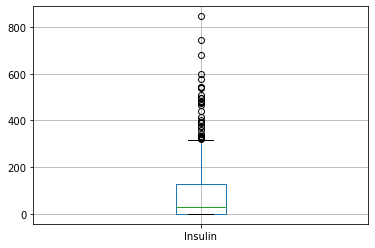

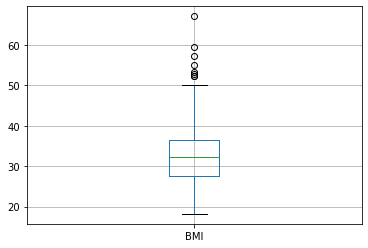

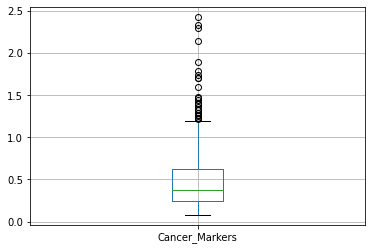

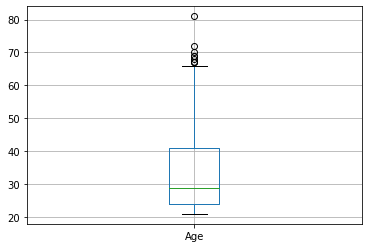

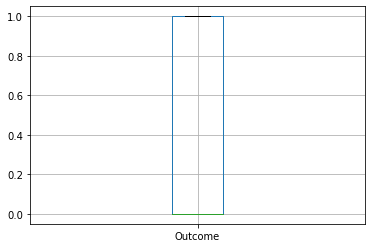

In [28]:
df_number = df.select_dtypes(include = 'number')
for col in df_number:
    df.boxplot(column=[col])
    plt.show()

Skin Thickness has Outliers. Lets remove them.

In [29]:
print(np.sum(df['SkinThickness'] > 80))

1


In [30]:
#drop the outliers
df.drop(df[df['SkinThickness'] > 80].index, inplace = True) 

## 4.d. Find co-relation between feature set

In [31]:
#Find correlation between features and plot heatmap for all the numerical values.
#lets plot heatmap using spearman correlation

spearman_corr= df.corr('spearman')
print(spearman_corr)

                Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies        1.000000  0.129882       0.186800      -0.084414 -0.127195   
Glucose            0.129882  1.000000       0.243316       0.064401  0.208880   
BloodPressure      0.186800  0.243316       1.000000       0.033474 -0.090552   
SkinThickness     -0.084414  0.064401       0.033474       1.000000  0.544526   
Insulin           -0.127195  0.208880      -0.090552       0.544526  1.000000   
BMI                0.001200  0.223943       0.290102       0.427134  0.177114   
Cancer_Markers    -0.042906  0.088800       0.007876       0.179220  0.222241   
Age                0.609337  0.278713       0.364846      -0.070705 -0.112269   
Outcome            0.199679  0.480076       0.172443       0.086886  0.068399   

                     BMI  Cancer_Markers       Age   Outcome  
Pregnancies     0.001200       -0.042906  0.609337  0.199679  
Glucose         0.223943        0.088800  0.278713  0.480076  


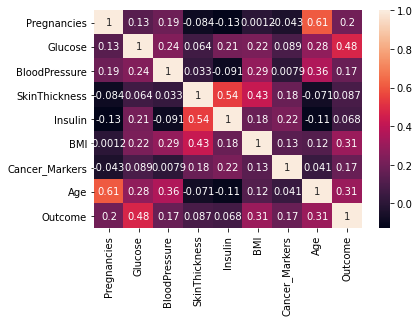

In [32]:
sns.heatmap(spearman_corr, annot=True)
plt.show()

From heatmap, following observations are seen:
1. Pregnancies is highly co-related to age with co-relation value of 0.61
2. Target Variable Outcome is highly dependent on Glucose feature with 0.48 co-relation value
3. Blood pressure has little co-relation with age - 0.36 co-relation value.
4. Skin Thickness is co-related to Insulin- 0.54 co-relation value, followed by its relation to BMI- 0.43

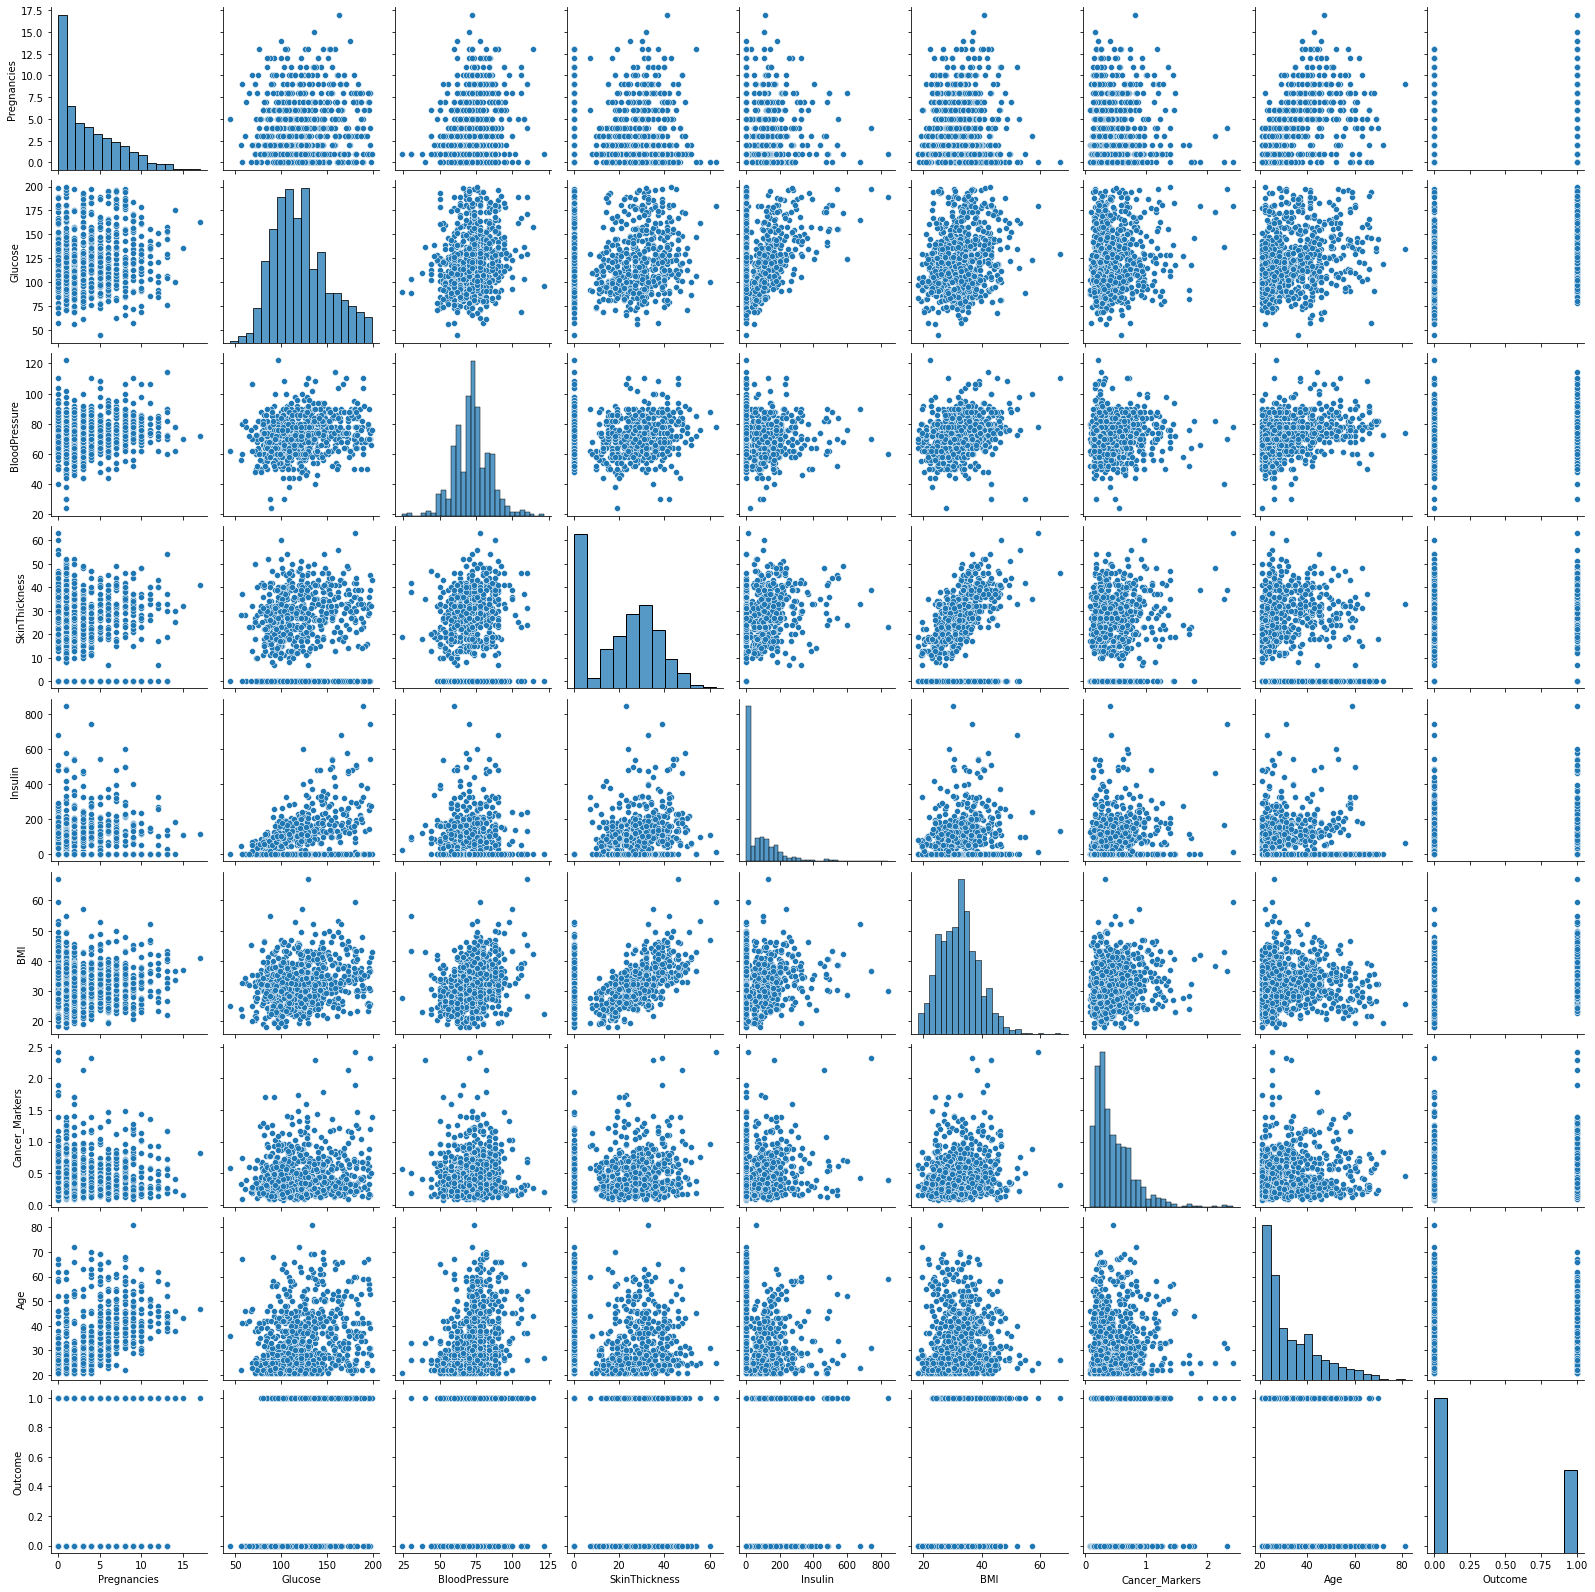

In [33]:
#Pairplot between features
sns.pairplot(df)

In [34]:
#Find correlation between features and plot heatmap for all the numerical values.
spearman_corr= df.corr('spearman')
print(spearman_corr)

#Flatten the corr matrix
df1 = spearman_corr.stack().reset_index()
df1.columns = ['FEATURE_1','FEATURE_2','corr']
# create a mask to identify rows with duplicate features as mentioned above
mask_dups = (df1[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (df1['FEATURE_1']==df1['FEATURE_2']) 

# apply the mask to clean the correlation dataframe
df1 = df1[~mask_dups]
print(df1)



                Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies        1.000000  0.129882       0.186800      -0.084414 -0.127195   
Glucose            0.129882  1.000000       0.243316       0.064401  0.208880   
BloodPressure      0.186800  0.243316       1.000000       0.033474 -0.090552   
SkinThickness     -0.084414  0.064401       0.033474       1.000000  0.544526   
Insulin           -0.127195  0.208880      -0.090552       0.544526  1.000000   
BMI                0.001200  0.223943       0.290102       0.427134  0.177114   
Cancer_Markers    -0.042906  0.088800       0.007876       0.179220  0.222241   
Age                0.609337  0.278713       0.364846      -0.070705 -0.112269   
Outcome            0.199679  0.480076       0.172443       0.086886  0.068399   

                     BMI  Cancer_Markers       Age   Outcome  
Pregnancies     0.001200       -0.042906  0.609337  0.199679  
Glucose         0.223943        0.088800  0.278713  0.480076  


In [35]:
#print those with corr = 1
print(df1[df1['corr'] >= 0.3])

        FEATURE_1 FEATURE_2      corr
7     Pregnancies       Age  0.609337
17        Glucose   Outcome  0.480076
25  BloodPressure       Age  0.364846
31  SkinThickness   Insulin  0.544526
32  SkinThickness       BMI  0.427134
53            BMI   Outcome  0.306136
71            Age   Outcome  0.307152


In [36]:
df.shape

(767, 9)

In [37]:
#Determine the golden feature set by taking strong relationship between dependent and independent variable from the figured correlation.
spearman_corr_joined = df.corr('spearman')['Outcome']
golden_feature_list_spearman = spearman_corr_joined[abs(spearman_corr_joined) >= 0.3].sort_values(ascending=False)
print(golden_feature_list_spearman)

Outcome    1.000000
Glucose    0.480076
Age        0.307152
BMI        0.306136
Name: Outcome, dtype: float64


The target variable Outcome is more dependent on Glucose, Age and BMI features.

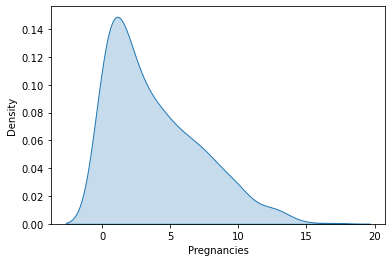

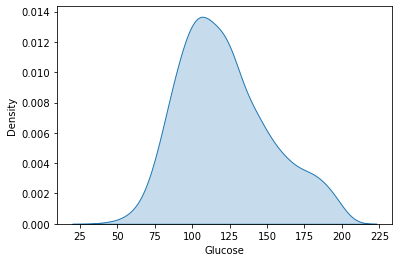

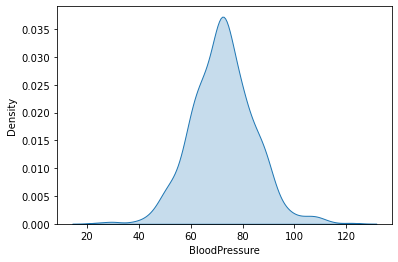

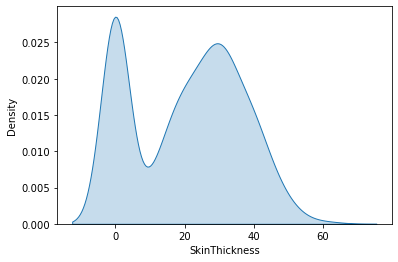

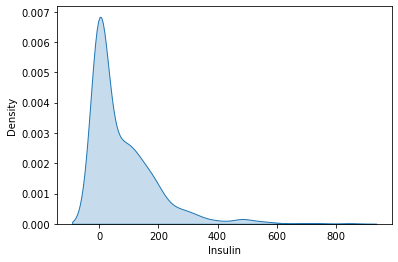

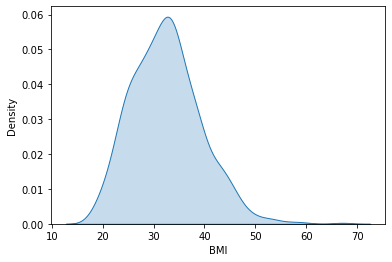

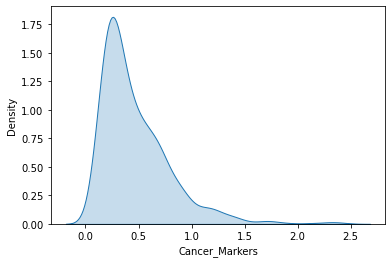

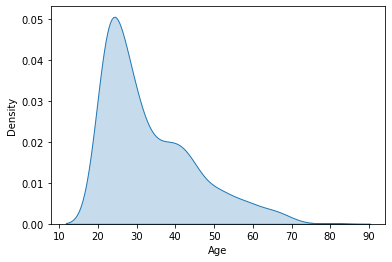

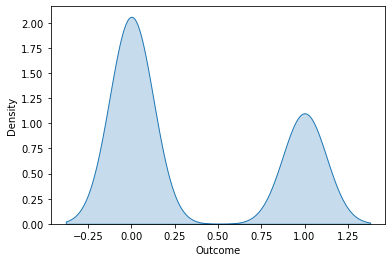

In [38]:
for i in df.select_dtypes(include='number').columns:
    sns.kdeplot(df[i],shade=True)
    plt.show()

In [39]:
df_new = df.copy()

In [40]:
bins = np.arange((df_new['Glucose']).min()
                 , (df_new['Glucose']).max(), 5)
df_new['Glucose_bin'] = pd.cut((df_new['Glucose']), bins)

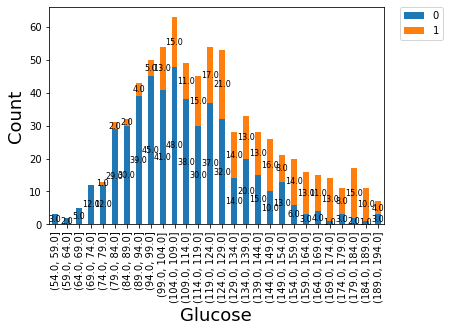

In [41]:
ax = pd.crosstab(df_new['Glucose_bin'], 
            df_new['Outcome']).plot.bar(stacked=True)

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
        
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Count", fontsize=18)
ax.set_xlabel("Glucose", fontsize=18)
plt.show()

clearly with increasing glucose levels, patients with cancerous state increases. Strong linear relationship is seen.

In [42]:
bins = np.arange((df_new['Age']).min()
                 , (df_new['Age']).max(), 5)
df_new['Age_bin'] = pd.cut((df_new['Age']), bins)

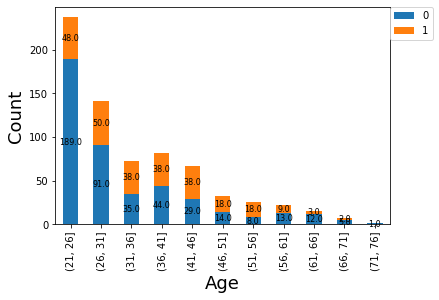

In [43]:
ax = pd.crosstab(df_new['Age_bin'], 
            df_new['Outcome']).plot.bar(stacked=True)

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
        
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Count", fontsize=18)
ax.set_xlabel("Age", fontsize=18)
plt.show()

people between 21-26 and 26-31 have less cancerous patients compared to other age group as the data available for younger age group is more.

In [44]:
bins = np.arange((df_new['BMI']).min()
                 , (df_new['BMI']).max(), 5)
df_new['BMI_bin'] = pd.cut((df_new['BMI']), bins)

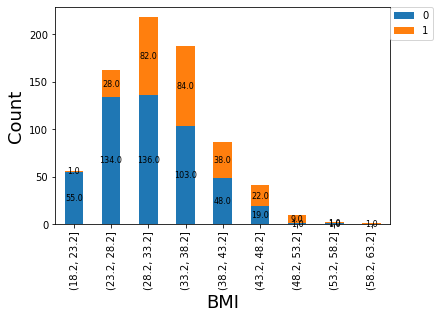

In [45]:
ax = pd.crosstab(df_new['BMI_bin'], 
            df_new['Outcome']).plot.bar(stacked=True)

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
        
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Count", fontsize=18)
ax.set_xlabel("BMI", fontsize=18)
plt.show()

With increasing BMI, outcome of being cancerous is seen increasing.

In [46]:
#for less related features carry out chi square test with target variable to see if they accept null hyposthesis
ct_ob = pd.crosstab(df_new['Cancer_Markers'].sample(frac=0.5, replace=True, random_state=1), 
            df_new['Outcome'].sample(frac=0.5, replace=True, random_state=1))

In [47]:
# we carry out a contingency test to check whether their is a correlation with the target variable 
# and  Cancer_Markers
H0 = "There is not relationship between Cancer_Markers and Outcome"
Ha = "There is a relationship between Cancer_Markers and Outcome"

stat, p, dof, expected = chi2_contingency(ct_ob)
print('p-value: ',p)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical :
    print(f'''Since p-value {p} < 0.05 we reject null hypothesis: {H0}.Thus alternate {Ha} holds good ''')
else:
    print(f'Fail to reject null hypothesis {H0}')

p-value:  0.00018334691079528305
probability=0.950, critical=285.734, stat=335.238
Since p-value 0.00018334691079528305 < 0.05 we reject null hypothesis: There is not relationship between Cancer_Markers and Outcome.Thus alternate There is a relationship between Cancer_Markers and Outcome holds good 


In [48]:
ct_ob = pd.crosstab(df_new['SkinThickness'].sample(frac=0.5, replace=True, random_state=1), 
            df_new['Outcome'].sample(frac=0.5, replace=True, random_state=1))

In [49]:
# we carry out a contingency test to check whether their is a correlation with the target variable 
# and  SkinThickness
H0 = "There is not relationship between SkinThickness and Outcome"
Ha = "There is a relationship between SkinThickness and Outcome"

stat, p, dof, expected = chi2_contingency(ct_ob)
print('p-value: ',p)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical :
    print(f'''Since p-value {p} < 0.05 we reject null hypothesis: {H0}.Thus alternate {Ha} holds good ''')
else:
    print(f'Fail to reject null hypothesis {H0}')

p-value:  0.00032105965460782005
probability=0.950, critical=60.481, stat=83.259
Since p-value 0.00032105965460782005 < 0.05 we reject null hypothesis: There is not relationship between SkinThickness and Outcome.Thus alternate There is a relationship between SkinThickness and Outcome holds good 


In [50]:
ct_ob = pd.crosstab(df_new['Pregnancies'].sample(frac=0.5, replace=True, random_state=1), 
            df_new['Outcome'].sample(frac=0.5, replace=True, random_state=1))

In [51]:
# we carry out a contingency test to check whether their is a correlation with the target variable 
# and  Pregnancies
H0 = "There is not relationship between Pregnancies and Outcome"
Ha = "There is a relationship between Pregnancies and Outcome"

stat, p, dof, expected = chi2_contingency(ct_ob)
print('p-value: ',p)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical :
    print(f'''Since p-value {p} < 0.05 we reject null hypothesis: {H0}.Thus alternate {Ha} holds good ''')
else:
    print(f'Fail to reject null hypothesis {H0}')

p-value:  1.6981358934170967e-09
probability=0.950, critical=22.362, stat=68.228
Since p-value 1.6981358934170967e-09 < 0.05 we reject null hypothesis: There is not relationship between Pregnancies and Outcome.Thus alternate There is a relationship between Pregnancies and Outcome holds good 


In [52]:
ct_ob = pd.crosstab(df_new['Insulin'].sample(frac=0.5, replace=True, random_state=1), 
            df_new['Outcome'].sample(frac=0.5, replace=True, random_state=1))

In [53]:
# we carry out a contingency test to check whether their is a correlation with the target variable 
# and  Insulin
H0 = "There is not relationship between Insulin and Outcome"
Ha = "There is a relationship between Insulin and Outcome"

stat, p, dof, expected = chi2_contingency(ct_ob)
print('p-value: ',p)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical :
    print(f'''Since p-value {p} < 0.05 we reject null hypothesis: {H0}.Thus alternate {Ha} holds good ''')
else:
    print(f'Fail to reject null hypothesis {H0}')

p-value:  0.0020509903125467805
probability=0.950, critical=131.031, stat=152.633
Since p-value 0.0020509903125467805 < 0.05 we reject null hypothesis: There is not relationship between Insulin and Outcome.Thus alternate There is a relationship between Insulin and Outcome holds good 


In [54]:
ct_ob = pd.crosstab(df_new['BloodPressure'].sample(frac=0.5, replace=True, random_state=1), 
            df_new['Outcome'].sample(frac=0.5, replace=True, random_state=1))

In [55]:
# we carry out a contingency test to check whether their is a correlation with the target variable 
# and  BloodPressure
H0 = "There is not relationship between BloodPressure and Outcome"
Ha = "There is a relationship between BloodPressure and Outcome"

stat, p, dof, expected = chi2_contingency(ct_ob)
print('p-value: ',p)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical :
    print(f'''Since p-value {p} < 0.05 we reject null hypothesis: {H0}.Thus alternate {Ha} holds good ''')
else:
    print(f'Fail to reject null hypothesis {H0}')

p-value:  8.716421647138134e-05
probability=0.950, critical=56.942, stat=83.971
Since p-value 8.716421647138134e-05 < 0.05 we reject null hypothesis: There is not relationship between BloodPressure and Outcome.Thus alternate There is a relationship between BloodPressure and Outcome holds good 


In [56]:
#Scale the data set
df_scaled = df.copy()
df_scaled.drop('Outcome', axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age
0,6,148.0,72.0,35,0,33.6,0.627,50
1,1,85.0,66.0,29,0,26.6,0.351,31
2,8,183.0,64.0,0,0,23.3,0.672,32
3,1,89.0,66.0,23,94,28.1,0.167,21
4,0,137.0,40.0,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63
764,2,122.0,70.0,27,0,36.8,0.340,27
765,5,121.0,72.0,23,112,26.2,0.245,30
766,1,126.0,60.0,0,0,30.1,0.349,47


In [57]:
colnames = df_scaled.select_dtypes(include= 'number').columns.tolist()
features = df_scaled[colnames]

In [58]:
from scipy.stats import skew
X = df_scaled.copy()
# find numeric features in your dataset to transform
numeric_feats = X.dtypes[X.dtypes != "object"].index

# calculate skew of all numeric features
skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# convert to dataframe for easier processing
skewness = pd.DataFrame({'Skew' :skewed_feats})

# print performance before transform
print("Pre: There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
print("Pre", abs(skewness.Skew).mean())



Pre: There are 9 skewed numerical features to Box Cox transform
Pre 0.9043406657832356


In [59]:
scaler = StandardScaler()
df_scaled[colnames] = scaler.fit_transform(features.values)


In [60]:
numeric_feats = df_scaled.dtypes[df_scaled.dtypes != "object"].index
skewed_feats = df_scaled[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})

# print performance after transform
print("Post: There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
print("Post", abs(skewness.Skew).mean())

Post: There are 9 skewed numerical features to Box Cox transform
Post 0.9043406657832356


# 5 MODEL BUILDING AND DIAGNOSTICS

In [61]:
#Set X and y Values
X = df.drop('Outcome',axis =1).values
y = df['Outcome'].values

In [62]:
# Do the test and train data split using stratify sampling.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,stratify = y, test_size=0.4)

In [63]:
#import KNNeighbour classifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy= np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a KNN Classifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #fit the model
    knn.fit(X_train,y_train)
    
    #compute the accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
    #print("Training accuracy for",i,"is",train_accuracy[i])
    
    #compute accuracy on test data set
    test_accuracy[i] = knn.score(X_test,y_test)
    test_accuracy[i]
    print("Accuracy for",i+1,"is",test_accuracy[i])

Accuracy for 1 is 0.6872964169381107
Accuracy for 2 is 0.7003257328990228
Accuracy for 3 is 0.7003257328990228
Accuracy for 4 is 0.7231270358306189
Accuracy for 5 is 0.7133550488599348
Accuracy for 6 is 0.7263843648208469
Accuracy for 7 is 0.7296416938110749
Accuracy for 8 is 0.7263843648208469
Accuracy for 9 is 0.7231270358306189
Accuracy for 10 is 0.7263843648208469
Accuracy for 11 is 0.7296416938110749
Accuracy for 12 is 0.7296416938110749
Accuracy for 13 is 0.7166123778501629
Accuracy for 14 is 0.7198697068403909
Accuracy for 15 is 0.7100977198697068
Accuracy for 16 is 0.7198697068403909
Accuracy for 17 is 0.7198697068403909
Accuracy for 18 is 0.7296416938110749
Accuracy for 19 is 0.7166123778501629


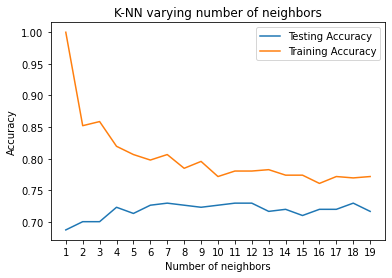

In [64]:
# Generate Plot

plt.title('K-NN varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.xticks(range(1,20))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [65]:
#set up a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)
    
#fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [66]:
#Get accuracy, Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7296416938110749

# Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model(or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [67]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [68]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[160,  40],
       [ 43,  64]], dtype=int64)

In [69]:
#plot crosstab for better readability
pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,160,40,200
1,43,64,107
All,203,104,307


## Evaluation metrices

Accuracy - (TP+TN)/TP+TN+FP+FN = 0.7296
Error rate - (1-accuracy) - 0.27035
Precision = TP/TP+FP = 0.615
Recall = TP/TP+FN = 0.598
F- measure = 2rp/r+p = 0.73554/1.828= 0.4023

In [81]:
# with accuracy as measure we also check precision, recall and f1-score
print('Precision is %2.3f' %precision_score(y_test, y_pred, pos_label=1))
print('Recall is %2.3f' %recall_score(y_test, y_pred, pos_label=1))

Precision is 0.615
Recall is 0.598


ROC (Receiver Operating Characteristics) Curve

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity(any increase in sensitivity will be accompanied by decrease in specificity).
2.  The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accuracy the test.
4. The area under the curve is a measure of test accuracy.

In [70]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_predict=knn.predict(X_test)
for i in range(100):
    print(y_test[i],y_predict[i],y_pred_proba[i],"\n")
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

0 0 0.0 

0 0 0.0 

0 0 0.2857142857142857 

0 0 0.2857142857142857 

0 0 0.14285714285714285 

0 0 0.0 

1 0 0.14285714285714285 

0 0 0.42857142857142855 

1 0 0.14285714285714285 

1 1 1.0 

0 0 0.0 

0 1 0.7142857142857143 

1 1 0.8571428571428571 

0 0 0.2857142857142857 

0 0 0.0 

1 1 0.5714285714285714 

0 0 0.0 

1 1 0.5714285714285714 

1 0 0.42857142857142855 

0 0 0.42857142857142855 

1 1 0.7142857142857143 

1 0 0.0 

0 0 0.2857142857142857 

0 0 0.42857142857142855 

0 0 0.2857142857142857 

0 0 0.2857142857142857 

0 0 0.14285714285714285 

1 0 0.2857142857142857 

0 1 0.8571428571428571 

1 1 0.8571428571428571 

0 0 0.0 

0 1 0.5714285714285714 

0 0 0.0 

1 1 0.5714285714285714 

1 1 1.0 

0 0 0.42857142857142855 

0 0 0.2857142857142857 

1 0 0.42857142857142855 

1 0 0.14285714285714285 

0 0 0.0 

0 0 0.14285714285714285 

0 1 0.8571428571428571 

1 0 0.42857142857142855 

1 1 0.8571428571428571 

1 0 0.2857142857142857 

0 1 0.5714285714285714 

0 0 0.28571428571

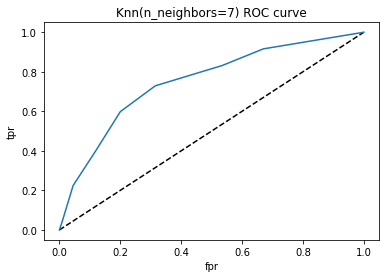

In [71]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [72]:
#Area under the ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.75053738317757

Hyperparameter tuning

The value of k(i.e., 7) we selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1. Trying a bunch of different hyperparameter values
2. Fitting all of them separately
3. Checking how well each performs
4. Choosing the best performing one
5. Using cross-validation every time

Scikit learn provides a simple way of achieving this using GridSearchCV i.e GridSearch Cross Validation.

Grid Search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

In [73]:
#import GridSearchCV
#GridSearchCV implements a "fit" and "score" method.
from sklearn.model_selection import GridSearchCV

In [74]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [75]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [76]:
knn_cv.best_score_

0.7523554876496054

In [77]:
knn_cv.best_params_

{'n_neighbors': 13}

Thus at k=13, we get optimal accuracy of 75.23%

Summary:
1. The target variable Outcome is more dependent on Glucose, Age and BMI features.
2.clearly with increasing glucose levels, patients with cancerous state increases. Strong linear relationship is seen.
3.Pregnancies is highly co-related to age with co-relation value of 0.61
4. Target Variable Outcome is highly dependent on Glucose feature with 0.48 co-relation value
5. Blood pressure has little co-relation with age - 0.36 co-relation value.
6. Skin Thickness is co-related to Insulin- 0.54 co-relation value, followed by its relation to BMI- 0.43
7.People between 21-26 and 26-31 have less cancerous patients compared to other age group as the data available for younger age group is more.
8. With increasing BMI, outcome of being cancerous is seen increasing.
9. Could not reject any features from chi square test
10. Using elbow method, found k =7 gives optimal accuracy of 72.96%
11. From confusion matrix, found true negative count 160/100 and  true positive count of 64/107.
12. Using Cross validation, we found k=13 given optimal accuracy of 75.23%